In [22]:
import numpy as np
import scipy
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Challenge: Model Comparison
 Estimated Time: 2-3 hours
You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.



In [23]:
df = pd.read_csv("/Users/bradleyrhyins/Desktop/Thinkful-Projects/Facebook_metrics/dataset_Facebook.csv", sep=r';')

In [24]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.000,2752,5091,178,109,159,3078,1640,119,4,79.000,17.000,100
1,139441,Status,2,12,3,10,0.000,10460,19057,1457,1361,1674,11710,6112,1108,5,130.000,29.000,164
2,139441,Photo,3,12,3,3,0.000,2413,4373,177,113,154,2812,1503,132,0,66.000,14.000,80
3,139441,Photo,2,12,2,10,1.000,50128,87991,2211,790,1119,61027,32048,1386,58,1572.000,147.000,1777
4,139441,Photo,2,12,2,3,0.000,7244,13594,671,410,580,6228,3200,396,19,325.000,49.000,393


In [25]:
df.columns

Index([u'Page total likes', u'Type', u'Category', u'Post Month',
       u'Post Weekday', u'Post Hour', u'Paid', u'Lifetime Post Total Reach',
       u'Lifetime Post Total Impressions', u'Lifetime Engaged Users',
       u'Lifetime Post Consumers', u'Lifetime Post Consumptions',
       u'Lifetime Post Impressions by people who have liked your Page',
       u'Lifetime Post reach by people who like your Page',
       u'Lifetime People who have liked your Page and engaged with your post',
       u'comment', u'like', u'share', u'Total Interactions'],
      dtype='object')

### KNN Regression

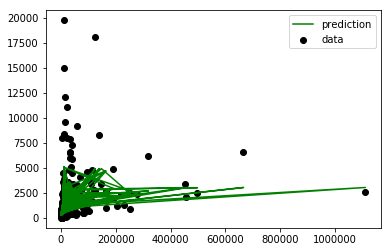

In [26]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df['Lifetime Post Total Impressions'])
Y = df['Lifetime Post Consumptions']
knn.fit(X, Y)

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(X)

plt.scatter(X, Y, c='k', label='data')
plt.plot(X, Y_, c='g', label='prediction')
plt.legend()
#plt.title('K=10, Unweighted')
plt.show()

### OLR

('Coefficients: \n', array([0.00588903]))
('Intercept: \n', 1240.8973726868849)


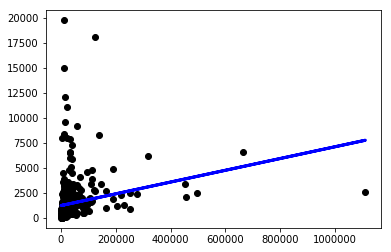

In [29]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, Y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#score_w = cross_val_score(knn_w, X, Y, cv=5)
#print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.24 (+/- 1.38)


### Model Behavior Explaination 

The OLR seems ot try to fit the line of all the data whereas the KNN regression doesn't and finds a path towards a different location. This is because KNN takes a vote on the values nearest each other based on the number of k bins that are assigned. Then it takes the average of the votes wins the value. In this KNN example the plotted values are over fit becasue the Unweighted Accuracy score is too high. If we weight it more and increase the number of K bins then this variance will probably decrease. The problem with OLR is that there are alot of assumtions that might make the data seem more fit and linear than it is.